In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn import preprocessing

In [4]:
import pandas_profiling

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib

In [7]:
import seaborn as sns

In [8]:
%matplotlib inline

In [9]:
matplotlib.style.use("ggplot")

In [10]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0,2,10000),
    'x2':np.random.normal(5,3,10000),
    'x3':np.random.normal(-5,5,10000)
})
df.head()

,x1,x2,x3
0,3.248691,4.632578,-14.657819
1,-1.223513,5.684509,-5.802131
2,-1.056344,3.943085,-9.161098
3,-2.145937,2.508340,-6.030558
4,1.730815,4.216731,0.131275


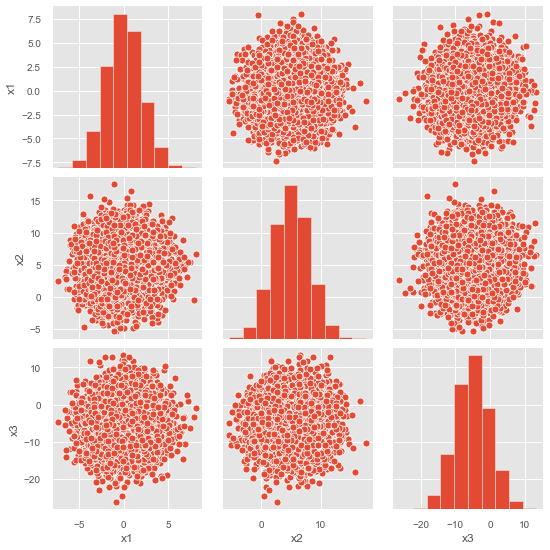

In [11]:
sns.pairplot(df)

In [12]:
pandas_profiling.ProfileReport(df)

In [13]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 1.61653543, -0.13175263, -1.9247574 ],
       [-0.62228462,  0.21847458, -0.14641572],
       [-0.53859835, -0.36131085, -0.82094159],
       ...,
       [-1.02516118,  2.39614871, -0.06951623],
       [-0.07255698,  0.87231272, -1.27409225],
       [-1.44940235, -0.10890221,  0.35836759]])

In [14]:
scaled_df = pd.DataFrame(scaled_df,columns=['x1','x2','x3'])

In [15]:
scaled_df.head()

,x1,x2,x3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092


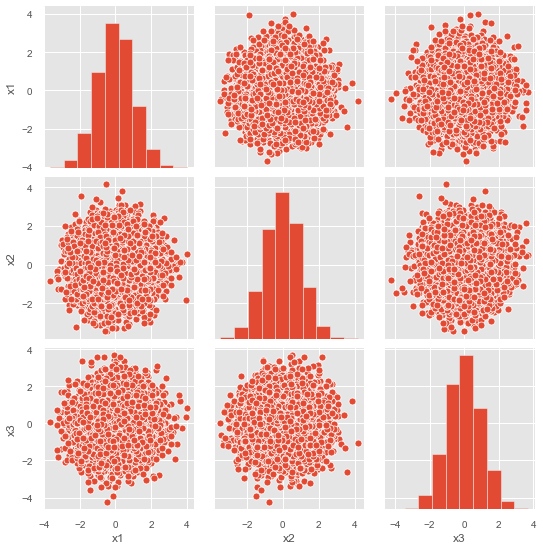

In [16]:
sns.pairplot(scaled_df,diag_kind="hist")

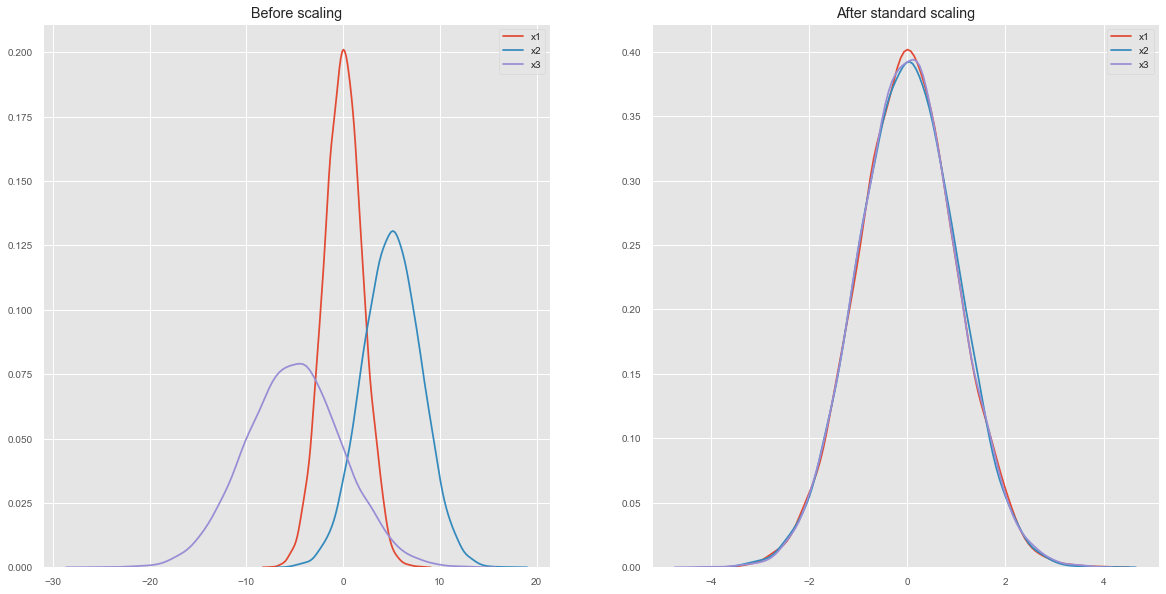

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))

ax1.set_title("Before scaling")
sns.kdeplot(df['x1'],ax = ax1)
sns.kdeplot(df['x2'],ax=ax1)
sns.kdeplot(df['x3'],ax=ax1)

ax2.set_title("After standard scaling")
sns.kdeplot(scaled_df['x1'],ax = ax2)
sns.kdeplot(scaled_df['x2'],ax=ax2)
sns.kdeplot(scaled_df['x3'],ax=ax2)
plt.show()

### Min-max scaler

In [18]:
df = pd.DataFrame({
    # positive skew (left hist)
    'x1':np.random.chisquare(8,1000),
    # nNegative skew(right hist)
    'x2':np.random.beta(8,2,1000) * 40,
    # no skew
    'x3': np.random.normal(50,3,1000)
})
df.head()

,x1,x2,x3
0,8.913396,33.282653,54.509849
1,5.583017,38.986294,52.473472
2,19.713205,26.377055,48.803613
3,23.293714,31.520740,50.593609
4,11.508381,38.646724,49.702286


In [19]:
pandas_profiling.ProfileReport(df)

In [20]:
scaler = preprocessing.MinMaxScaler()

In [21]:
scaled_df  = scaler.fit_transform(df)

In [22]:
scaled_df = pd.DataFrame(scaled_df,columns=['x1','x2','x3'])

In [23]:
scaled_df.head()

,x1,x2,x3
0,0.320592,0.776009,0.748636
1,0.184702,0.971903,0.645125
2,0.761260,0.538834,0.458583
3,0.907357,0.715496,0.549570
4,0.426476,0.960240,0.504263


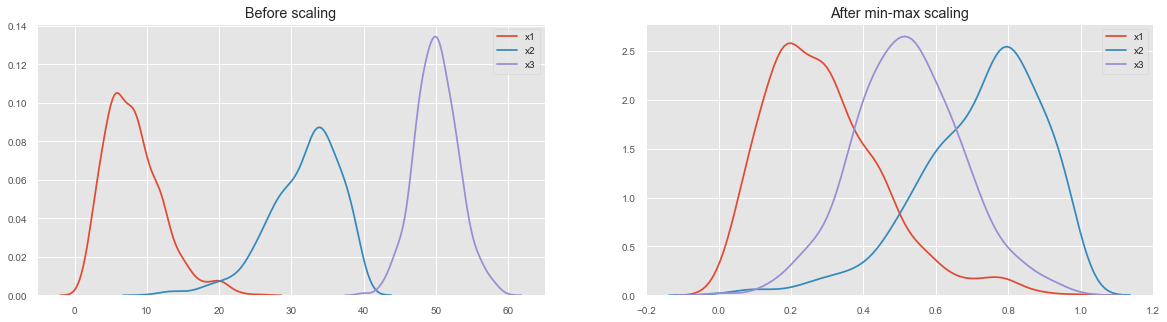

In [24]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))

ax1.set_title("Before scaling")
sns.kdeplot(df['x1'],ax = ax1)
sns.kdeplot(df['x2'],ax=ax1)
sns.kdeplot(df['x3'],ax=ax1)

ax2.set_title("After min-max scaling")
sns.kdeplot(scaled_df['x1'],ax = ax2)
sns.kdeplot(scaled_df['x2'],ax=ax2)
sns.kdeplot(scaled_df['x3'],ax=ax2)
plt.show()

### Robust scaler

In [25]:
x = pd.DataFrame({
    # Distribution with linear outliers
    'x1': np.concatenate([np.random.normal(20,1,1000),np.random.normal(1,1,25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30,1,1000),np.random.normal(50,1,25)])
})
x.head()

,x1,x2
0,21.289328,30.339567
1,20.475220,28.989049
2,20.472324,29.108980
3,17.862670,30.381639
4,20.554138,28.639373


In [26]:
scaler = preprocessing.RobustScaler()

In [27]:
robust_scaled_df = scaler.fit_transform(x)

In [28]:
robust_scaled_df = pd.DataFrame(robust_scaled_df,columns=['x1','x2'])

In [29]:
robust_scaled_df.head()

,x1,x2
0,0.946526,0.203267
1,0.319729,-0.692477
2,0.317499,-0.612932
3,-1.691723,0.231172
4,0.380490,-0.924403


In [30]:
scaler = preprocessing.MinMaxScaler()
min_scaled_df = scaler.fit_transform(x)
min_scaled_df = pd.DataFrame(min_scaled_df,columns=['x1','x2'])

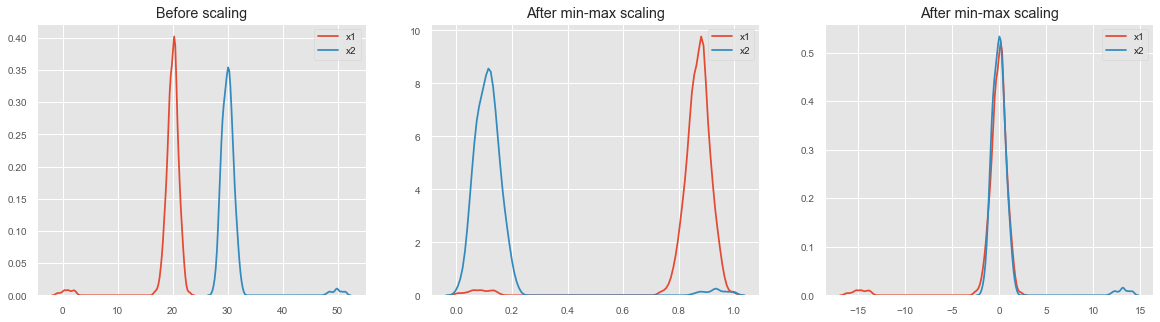

In [31]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))

ax1.set_title("Before scaling")
sns.kdeplot(x['x1'],ax = ax1)
sns.kdeplot(x['x2'],ax=ax1)

ax2.set_title("After min-max scaling")
sns.kdeplot(min_scaled_df['x1'],ax = ax2)
sns.kdeplot(min_scaled_df['x2'],ax=ax2)


ax3.set_title("After min-max scaling")
sns.kdeplot(robust_scaled_df['x1'],ax = ax3)
sns.kdeplot(robust_scaled_df['x2'],ax=ax3)

plt.show()

In [32]:
maxabs= preprocessing.MaxAbsScaler()

In [33]:
maxabs_scaled_df = maxabs.fit_transform(x)

In [34]:
maxabs_scaled_df = pd.DataFrame(maxabs_scaled_df,columns = ['x1','x2'])

In [35]:
maxabs_scaled_df

,x1,x2
0,0.918488,0.589228
1,0.883365,0.563000
2,0.883240,0.565329
3,0.770651,0.590045
4,0.886770,0.556208
...,...,...
1020,0.073654,0.969614
1021,0.010143,0.937189
1022,0.098635,0.970628
1023,-0.039607,0.988237


In [36]:
scaler = preprocessing.RobustScaler()

In [37]:
robust_scaled_df = scaler.fit_transform(x)

In [38]:
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1','x2'])
robust_scaled_df.head()

,x1,x2
0,0.946526,0.203267
1,0.319729,-0.692477
2,0.317499,-0.612932
3,-1.691723,0.231172
4,0.380490,-0.924403


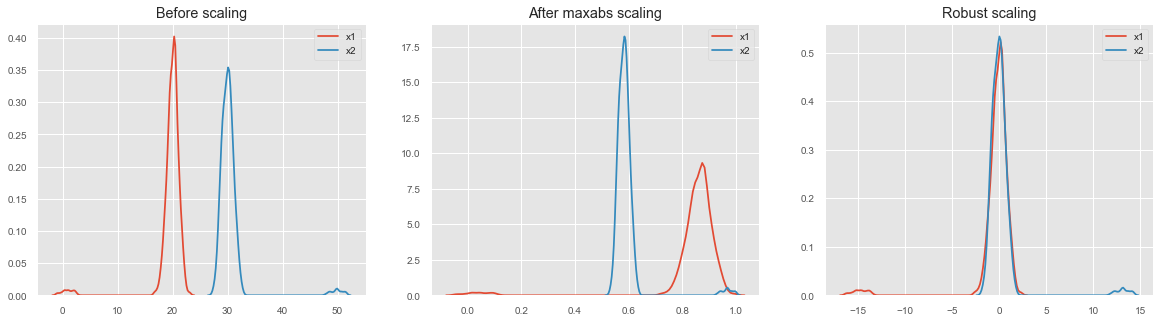

In [39]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))

ax1.set_title("Before scaling")
sns.kdeplot(x['x1'],ax = ax1)
sns.kdeplot(x['x2'],ax=ax1)


ax2.set_title("After maxabs scaling")
sns.kdeplot(maxabs_scaled_df['x1'],ax = ax2)
sns.kdeplot(maxabs_scaled_df['x2'],ax=ax2)

ax3.set_title("Robust scaling")
sns.kdeplot(robust_scaled_df['x1'],ax=ax3)
sns.kdeplot(robust_scaled_df['x2'],ax=ax3)
plt.show()

### Normalizer

In [40]:
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame({
    'x1': np.random.randint(-100,100,1000).astype(float),
    'y1': np.random.randint(-80,80,1000).astype(float),
    'z1': np.random.randint(-150,150,1000).astype(float),
})
df.head()

,x1,y1,z1
0,-7.0,-68.0,67.0
1,64.0,-5.0,-82.0
2,-99.0,62.0,8.0
3,58.0,32.0,-26.0
4,50.0,9.0,123.0


In [41]:
df.tail()

,x1,y1,z1
995,59.0,-69.0,15.0
996,-99.0,0.0,21.0
997,88.0,20.0,103.0
998,-58.0,-68.0,-40.0
999,-94.0,-22.0,107.0


In [42]:
df.describe()

,x1,y1,z1
count,1000.000000,1000.000000,1000.000000
mean,-0.777000,-2.762000,4.446000
std,59.330864,46.392625,86.043015
min,-100.000000,-80.000000,-150.000000
25%,-55.250000,-45.000000,-67.000000
50%,0.000000,-3.000000,9.000000
75%,52.000000,37.000000,79.000000
max,99.000000,79.000000,149.000000


In [43]:
df.isnull().describe()

,x1,y1,z1
count,1000,1000,1000
unique,1,1,1
top,False,False,False
freq,1000,1000,1000


In [44]:
scaler =preprocessing.Normalizer()

In [45]:
norm_scaled_df = scaler.fit_transform(df)

In [46]:
norm_scaled_df = pd.DataFrame(norm_scaled_df,columns = ['x1','y1','z1'])
norm_scaled_df.head()

,x1,y1,z1
0,-0.073131,-0.710418,0.699970
1,0.614561,-0.048013,-0.787407
2,-0.845536,0.529528,0.068326
3,0.815044,0.449680,-0.365365
4,0.375717,0.067629,0.924264


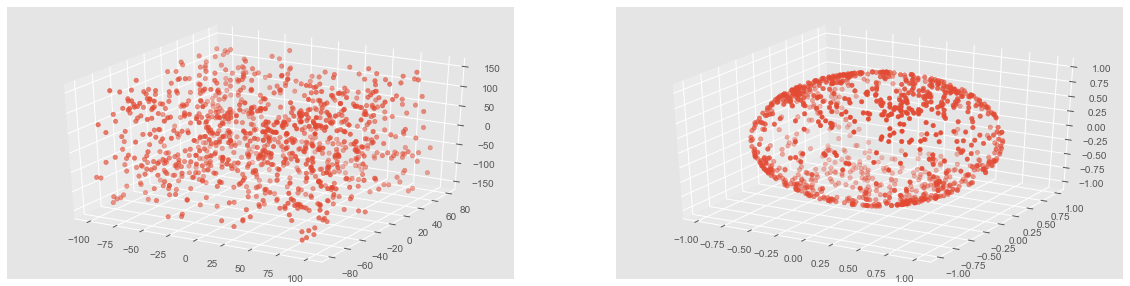

In [47]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122,projection ='3d')
ax1.scatter(df['x1'],df['y1'],df['z1'])
ax2.scatter(norm_scaled_df['x1'],norm_scaled_df['y1'],norm_scaled_df['z1'])
plt.show()

## Non linear Relation ship

### 

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [11]:
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [12]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
data = pd.DataFrame(iris.data)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
data.columns = iris.feature_names
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
data['target'] = pd.DataFrame(iris.target)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
x,y = load_iris(return_X_y=True)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

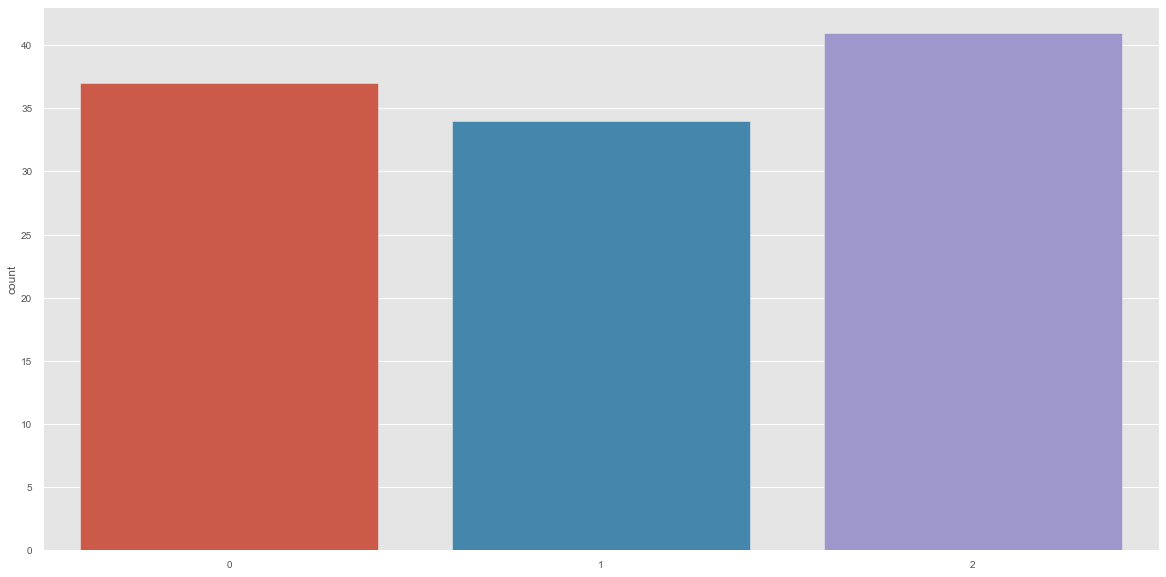

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(y_train)

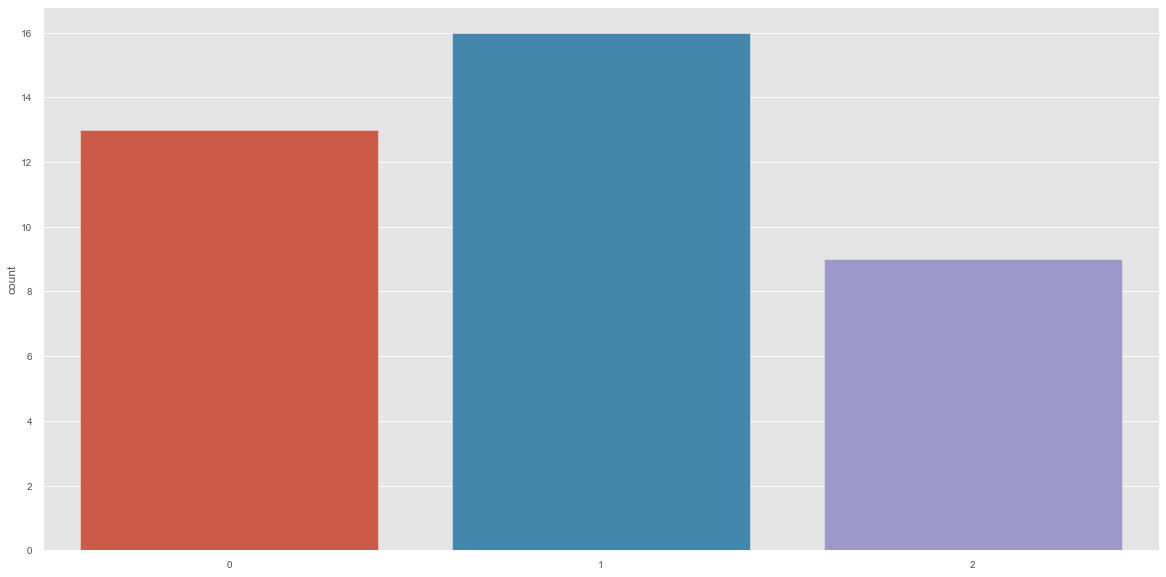

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(y_test)

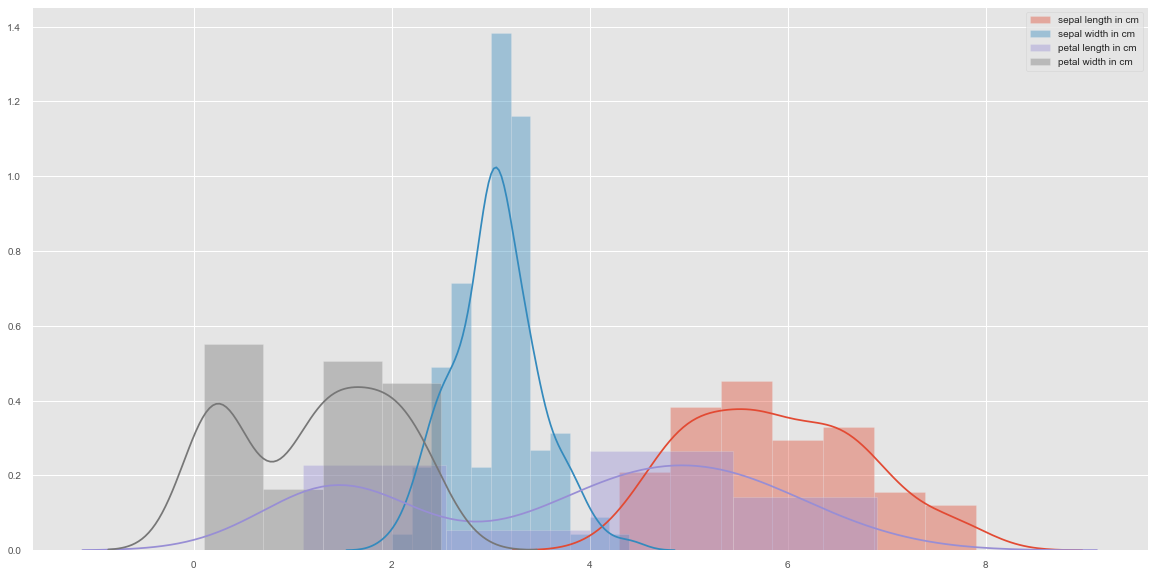

In [20]:
plt.figure(figsize=(20,10))
sns.distplot(x_train[:, 0],kde=True,label="sepal length in cm") # for column 1
sns.distplot(x_train[:, 1],kde=True,label="sepal width in cm") # for column 2
sns.distplot(x_train[:, 2],kde=True,label="petal length in cm") # for column 3
sns.distplot(x_train[:, 3],kde=True,label="petal width in cm") # for column 4
plt.legend()

Text(0, 0.5, 'sepal width')

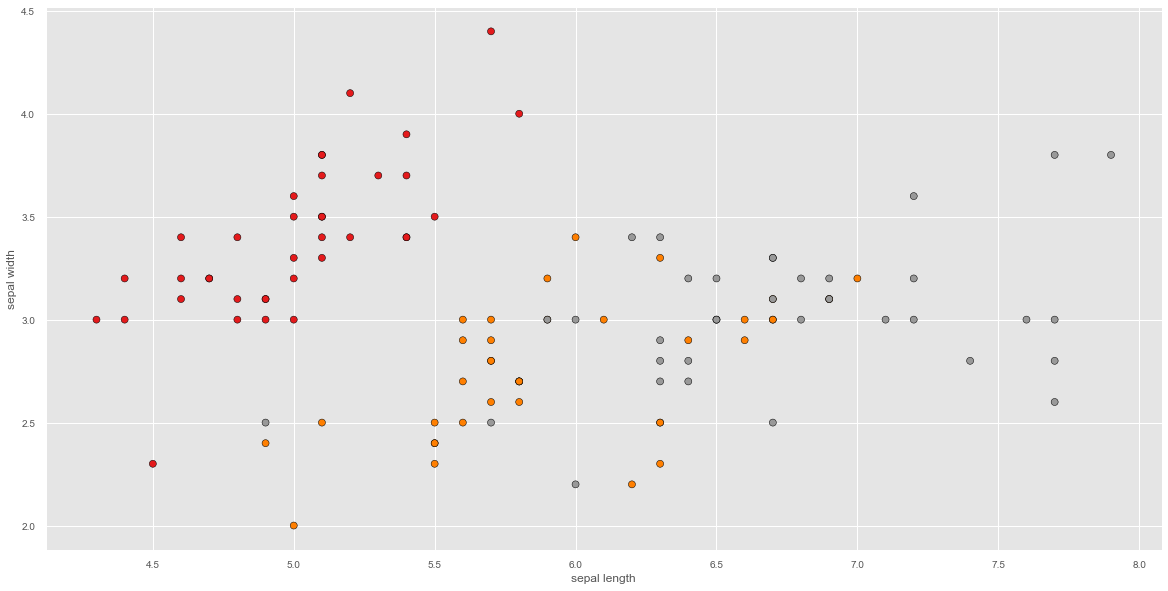

In [21]:
# plotting for training data
plt.figure(figsize=(20,10))
plt.scatter(x_train[:, 0],x_train[:, 1],c= y_train , cmap=plt.cm.Set1,
           edgecolor="k")
plt.xlabel("sepal length")
plt.ylabel("sepal width")

Text(0, 0.5, 'petal width')

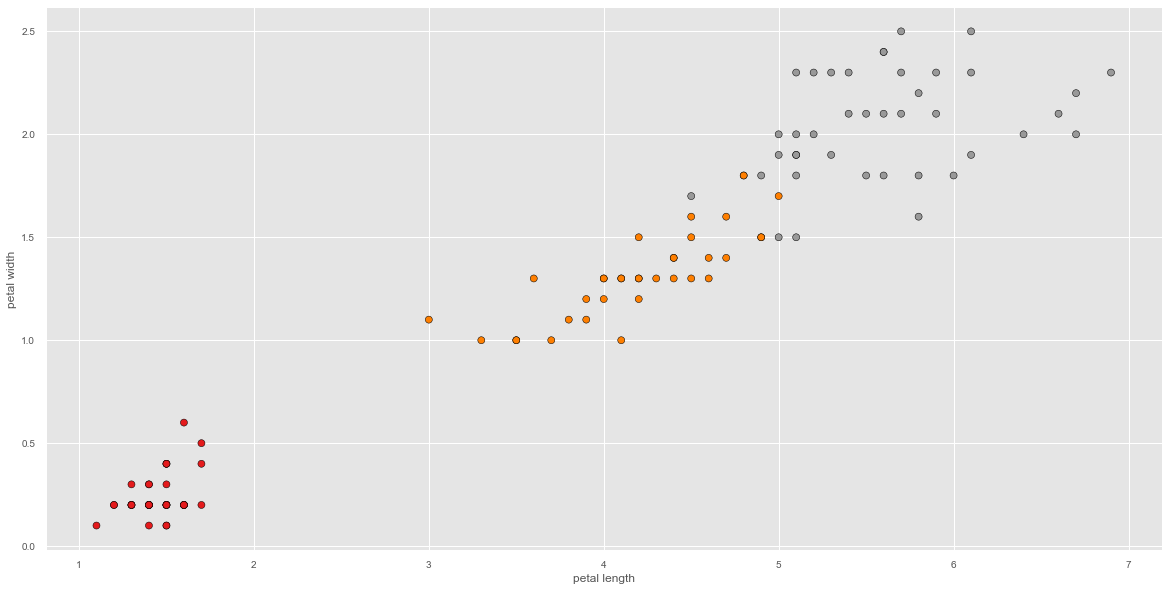

In [22]:
# plotting for training data
plt.figure(figsize=(20,10))
plt.scatter(x_train[:, 2],x_train[:, 3],c= y_train , cmap=plt.cm.Set1,
           edgecolor="k")
plt.xlabel("petal length")
plt.ylabel("petal width")

In [23]:
x_train.shape

(112, 4)

In [24]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100)
x_train_transformer = quantile_transformer.fit_transform(x_train)
x_test_transformer = quantile_transformer.transform(x_test)

**Sepal length before Transformation**

In [25]:
np.percentile(x_train[:,0],[0,25,50,75,100]) # sepal length original data

array([4.3, 5.1, 5.8, 6.5, 7.9])

**Trained data sepal length after transformation**

In [26]:
np.percentile(x_train_transformer[:,0],[0,25,50,75,100]) # sepal length original data # 0 to 1

array([0.        , 0.23737374, 0.51010101, 0.74242424, 1.        ])

**Tested Data sepal length Before Transformation**

In [27]:
np.percentile(x_test[:,0],[0,25,50,75,100])

array([4.4  , 5.125, 5.75 , 6.175, 7.3  ])

In [28]:
np.percentile(x_test_transformer[:,0],[0,25,50,75,100])

array([0.01010101, 0.24873737, 0.47979798, 0.6031941 , 0.94144144])

### Quantile Transformation(Normal)

In [29]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100,output_distribution="normal") # By default it is uniform
x_train_transformer = quantile_transformer.fit_transform(x_train)
x_test_transformer = quantile_transformer.transform(x_test)

In [30]:
np.percentile(x_train[:,0],[0,25,50,75,100])

array([4.3, 5.1, 5.8, 6.5, 7.9])

This feature corresponds to the sepal length in cm. once the quantile transformation  is apploed those landmarks approach closely the percentiles previously defined

In [31]:
np.percentile(x_train_transformer[:,0],[0,25,50,75,100])

array([-5.19933758, -0.71477599,  0.02532218,  0.65083731,  5.19933758])

### Power Transformation:
**Def:** Power transforms are a family of parametric, monotonic(To bring the data into normal distribution) transformations that aim to map data from any distribution to as close to guassian as possible in order to stabilizw variance and minimize skweness.
* Power Transformer currently provides to such power transformations
    - yeo Johnson
        * *Def:*
    - Box-cox transform
        * **Def:** A Box-cox transformation is way to transfrom dependent variables is not 

In [32]:
pt_johnson = preprocessing.PowerTransformer() #By defaultly we have Yeo Johnson

In [33]:
pt_johnson.method

'yeo-johnson'

In [34]:
pt_box_cox = preprocessing.PowerTransformer(method="box-cox")

In [35]:
rng = np.random.RandomState(304)

In [36]:
pt_box_cox.method

'box-cox'

In [37]:
# n_quantile is should be a set to a training set 
qt_normal = preprocessing.QuantileTransformer(n_quantiles=500,
                                             output_distribution="normal",
                                             random_state=rng)

In [38]:
qt_normal.n_quantiles

500

In [39]:
n_sample = 1000
font_size = 6
bins = 30

In [40]:
size = (n_sample,1)

In [41]:
x_lognormal = rng.lognormal(size=size)

In [42]:
df= 3
x_chisquare= rng.chisquare(df=df,size=size)

In [43]:
a = 50 
x_weibull = rng.weibull(a=a,size=size)

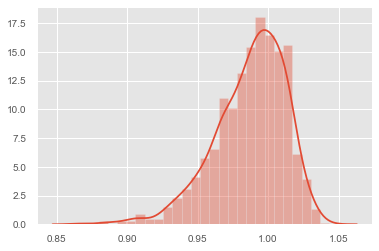

In [44]:
sns.distplot(x_weibull)

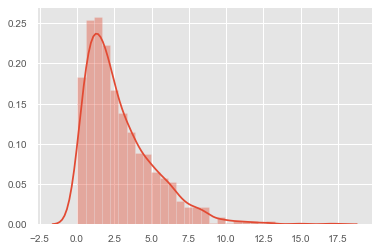

In [45]:
sns.distplot(x_chisquare)

In [46]:
# Guassian distribution
loc= 100

x_guassian= rng.normal(loc=loc,size=size)

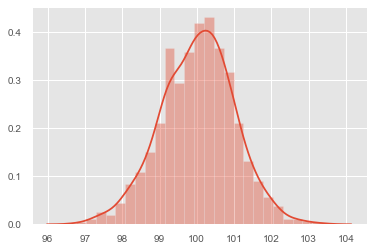

In [47]:
sns.distplot(x_guassian)

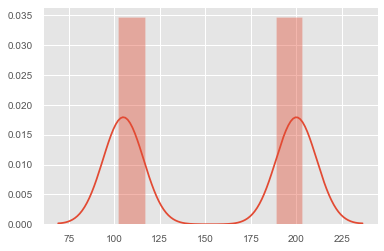

In [48]:
# bimodel distribution
loc_a, loc_b= 200,105
x_a,x_b = rng.normal(loc=loc_a,size=size),rng.normal(loc=loc_b,size=size)
x_bimodal = np.concatenate([x_a,x_b],axis=0)
sns.distplot(x_bimodal)

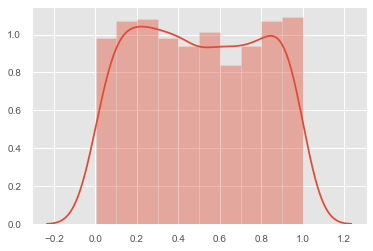

In [49]:
# uniform distribution
x_uniform = rng.uniform (low=0,high=1,size=size)
sns.distplot(x_uniform)

### Checking percentiles of all columns

In [50]:
np.percentile(x_train[:,1],[0,25,50,75,100])

array([2. , 2.8, 3. , 3.3, 4.4])

In [51]:
np.percentile(x_train_transformer[:,1],[0,25,50,75,100])

array([-5.19933758, -0.61985457, -0.16532667,  0.66656426,  5.19933758])

In [52]:
np.percentile(x_test_transformer[:,1],[0,25,50,75,100])

array([-2.32257453, -0.61985457, -0.3261603 ,  0.88949451,  2.48527927])

In [53]:
np.percentile(x_train_transformer[:,2],[0,25,50,75,100])

array([-5.19933758, -0.66204576, -0.0133876 ,  0.67448975,  5.19933758])

In [54]:
np.percentile(x_test_transformer[:,2],[0,25,50,75,100])

array([-5.19933758, -0.57163629,  0.09518546,  0.29541514,  1.76573048])

In [55]:
np.percentile(x_train_transformer[:,3],[0,25,50,75,100])

array([-5.19933758, -0.65083731, -0.06334102,  0.69852571,  5.19933758])

In [56]:
np.percentile(x_test_transformer[:,3],[0,25,50,75,100])

array([-5.19933758, -0.62433979,  0.02542214,  0.22988412,  5.19933758])

In [57]:
distributions = [
    ('log normal', x_lognormal),
    ('chisqaure',x_chisquare),
    ("weibull",x_weibull),
    ("guassian",x_guassian),
    ("uniform",x_uniform),
    ("bimodel",x_bimodal)
]

colors = ["#D81660","#0188FF","#FFC107",
         "#B7A2FF","#00ff00","#2EC5AC"]

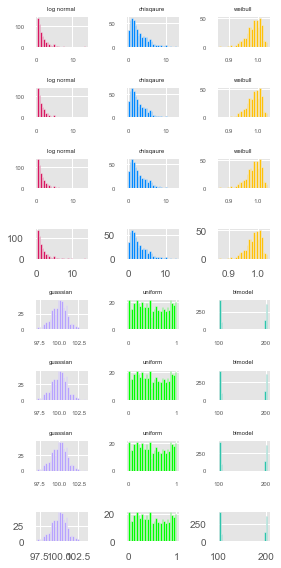

In [58]:
fig,axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_id = [(0,3,6,9),(1,4,7,10),(2,5,8,11),(12,15,18,21),
          (13,16,19,22),(14,17,20,23)]
axes_list = [(axes[i],axes[j],axes[k],axes[l])
            for (i,j,k,l) in axes_id]
             
             
             
for distribution,color,axes in zip(distributions,colors,axes_list):
    name, x = distribution
    # here we consider 50% of the data
    x_train,x_test= train_test_split(x,test_size=0.5)       
     #perfrom power transforms
    x_trans_bc = pt_box_cox.fit(x_train).transform(x_test)
    lmbda_bc = round(pt_box_cox.lambdas_[0],2)
             
    x_trans_yj = pt_johnson.fit(x_train).transform(x_test)
    lmbda_yj = round(pt_johnson.lambdas_[0],2)
             
             # perform quantile transfrom 
    x_trans_qt = qt_normal.fit(x_train).transform(x_test)

    
    ax_original,ax_bc,ax_yj,ax_qt = axes
    
    ax_original.hist(x_train, color=color, bins=bins)
    ax_original.set_title(name,fontsize=font_size) # to display the name of method
    ax_original.tick_params(axis="both",which="major",labelsize=font_size)
    
    for ax,ax_trans_,meth_name,lmbda in zip ((ax_bc,ax_yj,ax_qt),
(x_trans_bc,x_trans_yj,x_trans_qt),("Box-Cox","Yeo-Johnson","Quantile transform"),
(lmbda_bc,lmbda_yj,None)
    ):
        ax.hist(x_train,color=color,bins=bins)
        title="After {}".format(meth_name)
        if lmbda is not None:
            title += r'\n$\lambda$ = {}'.format(lmbda)
            ax.set_title(name,fontsize= font_size)
            ax.tick_params(axis='both',which = 'major',labelsize=font_size)
plt.tight_layout()
plt.savefig("Nonlinear scaling.png",dpi=200)
plt.show()

In [60]:
x_train.shape

(500, 1)

AttributeError: 'QuantileTransformer' object has no attribute 'lambdas_'

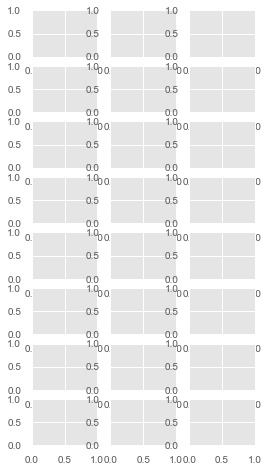

In [59]:
fig,axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_id = [(0,3,6,9),(1,4,7,10),(2,5,8,11),(12,15,18,21),
          (13,16,19,22),(14,17,20,23)]
axes_list = [(axes[i],axes[j],axes[k],axes[l])
            for (i,j,k,l) in axes_id]
             
             
             
for distribution,color,axes in zip(distributions,colors,axes_list):
    name, x = distribution
             # here we consider 50% of the data
    x_train,x_test= train_test_split(x,test_size=0.5)       
     #perfrom power transforms
    x_trans_bc = pt_box_cox.fit(x_train).transform(x_test)
    lmbda_bc = round(pt_box_cox.lambdas_[0],2)
             
    x_trans_yj = pt_johnson.fit(x_train).transform(x_test)
    lmbda_yj = round(pt_johnson.lambdas_[0],2)
             
             # perform quantile transfrom 
    x_trans_qt = qt_normal.fit(x_train).transform(x_test)
    lmbda_qt = round(qt_normal.lambdas_[0],2)

    
    ax_original,ax_bc,ax_yj,ax_qt = axes
    
    ax_original.hist(x_train, color=color, bins=bins)
    ax_original.set_title(name,fontsize=font_size) # to display the name of method
    ax_original.tick_params(axis="both",which="major",labelsize=font_size)
    
    for ax,ax_trans_,meth_name,lmbda in zip ((ax_bc,ax_yj,ax_qt),
(x_trans_bc,x_trans_yj,x_trans_qt),("Box-Cox","Yeo-Johnson","Quantile transform"),
(lmbda_bc,lmbda_yj,lmbda_qt)
    ):
        ax.hist(x_train,color=color,bins=bins)
        title="After {}".format(meth_name)
        if lmbda is not None:
            title += r'\n$\lambda$ = {}'.format(lmbda)
            ax.set_title(name,fontsize= font_size)
            ax.tick_params(axis='both',which = 'major',labelsize=font_size)
plt.tight_layout()
plt.savefig("Nonlinear scaling.png",dpi=200)
plt.show()